!pip install scikit-image
!pip install opencv-python

In [15]:
from skimage import io

# read image as uint8 type
img = io.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png')

In [16]:
print(img.shape)

# y, x, number of channels

(344, 443, 3)


In [17]:
# convert image to float type

from skimage import img_as_float
img2 = img_as_float(img)

In [18]:
print(img2.shape)

(344, 443, 3)


In [19]:
# convert image to ubyte type
from skimage import img_as_ubyte

img_8bit = img_as_ubyte(img2)

In [20]:
print(img_8bit.shape)

(344, 443, 3)


In [21]:
import cv2

#BGR

img_cv2 = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png')

In [22]:
print(img_cv2.shape)

(344, 443, 3)


In [23]:
# gray scaled image

gray_img = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 0)

In [24]:
print(gray_img.shape)

(344, 443)


In [25]:
#converting images from one color scale to another

img_opencv = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

In [26]:
# Filters

from skimage import filters

gaussian_img = filters.gaussian(img, sigma = 3)

<ipython-input-26-2a32a64ec217>:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_img = filters.gaussian(img, sigma = 3)


In [27]:
print(img.dtype)
print(gaussian_img.dtype) # becomes blurred

uint8
float64


In [28]:
# writing image back to local drive

# saving using scikit
io.imsave(r'C:\Users\nishantjairath\Downloads\archive\3 - Copy (3).png', gaussian_img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


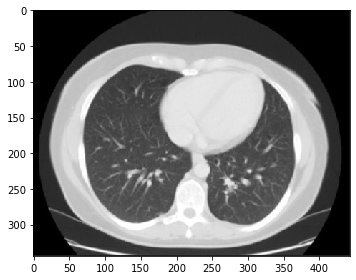

In [29]:
io.imshow(img)

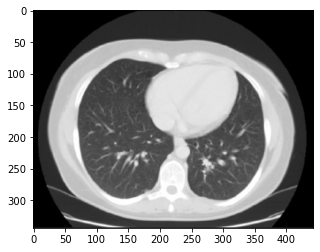

In [30]:
import matplotlib.pyplot as plt
plt.imshow(img)

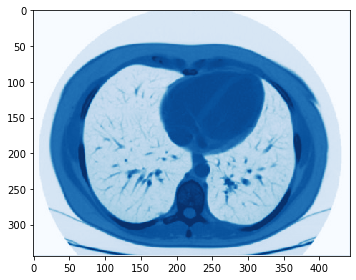

In [31]:
io.imshow(gray_img, cmap = 'Blues')

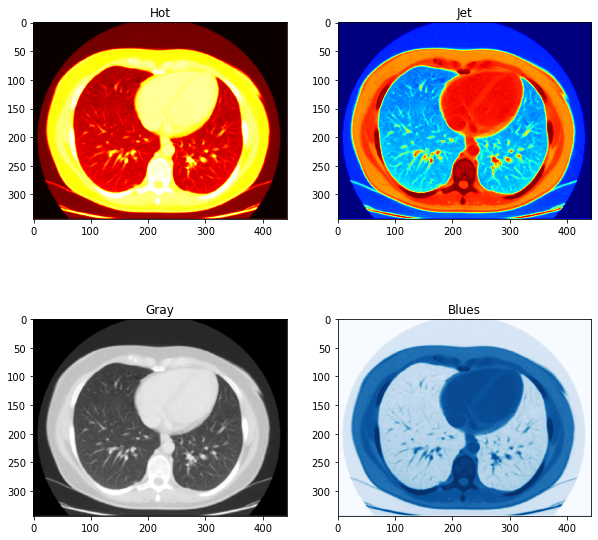

In [32]:
fig = plt.figure(figsize= (10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(gray_img, cmap = 'hot')
ax1.title.set_text('Hot')

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(gray_img, cmap = 'jet')
ax2.title.set_text('Jet')

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(gray_img, cmap = 'gray')
ax3.title.set_text('Gray')

ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(gray_img, cmap = 'Blues')
ax4.title.set_text('Blues')

(array([79489.,  1028.,   402.,  1322.,   253.,   376.,   625.,   957.,
          156.,  1350.,   281.,   338.,  1474.,   342.,  1102.,  7377.,
        40117.,  6473.,  8315.,  4366.,  4251.,  4035.,  2573.,  3257.,
         3210.,  6458.,  5557., 10971.,  8339., 14195., 14533.,  8293.,
         9740.,  4876.,  6224.,  3061.,  3780.,  1932.,  2580.,  1350.,
         1715.,  1522.,   886.,  1229.,   781.,  1082.,   638.,   973.,
          613.,   813.,   740.,   514.,   716.,   531.,   748.,   438.,
          683.,   462.,   625.,   443.,   672.,   626.,   439.,   701.,
          415.,   666.,   399.,   698.,   447.,   609.,   697.,   505.,
          838.,   784.,  6249., 14924., 17375.,  5936.,  6045.,  3235.,
         4469.,  4713.,  3430.,  6462.,  5232., 11137.,  9404., 10034.,
         6411., 19640.,  6256.,   850.,   937.,   728.,  1478.,  1171.,
         1613.,  1057.,  2105.,  6279.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

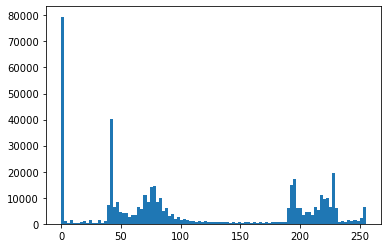

In [33]:
import  matplotlib.pyplot as plt

plt.hist(img.flat, bins = 100, range=(0, 255))

In [34]:
# Basic image processing

from skimage.transform import rescale, resize, downscale_local_mean

# as_gray converts image's np array on a scale of 0 to 1
print(img.shape)
print(gray_img.shape)

(344, 443, 3)
(344, 443)


In [35]:
img_rescaled = rescale(img, 1.0/4.0, anti_aliasing = False)

In [36]:
print(img_rescaled.shape)

(86, 111, 1)


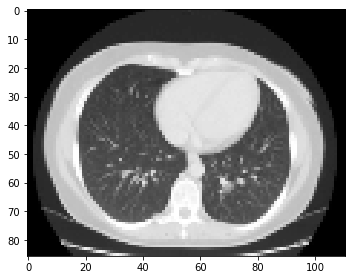

In [37]:
io.imshow(img_rescaled)

(200, 200, 3)


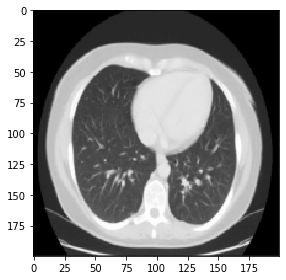

In [38]:
img_resized = resize(img, (200, 200), anti_aliasing = True)
print(img_resized.shape)
io.imshow(img_resized)

In [39]:
# rescaling is a better option than resizing for compressing the image

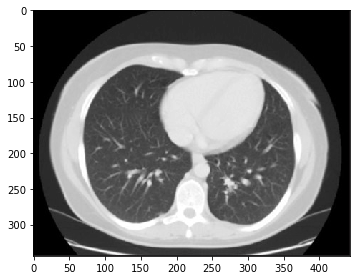

In [40]:
# Unsharped Image

# Convert images to float for scikit; in cv2 it does not matter

img2 = img_as_float(img)
io.imshow(img2)

In [41]:
from skimage.filters import unsharp_mask

img_unsharped = unsharp_mask(img2, radius = 3, amount = 2)

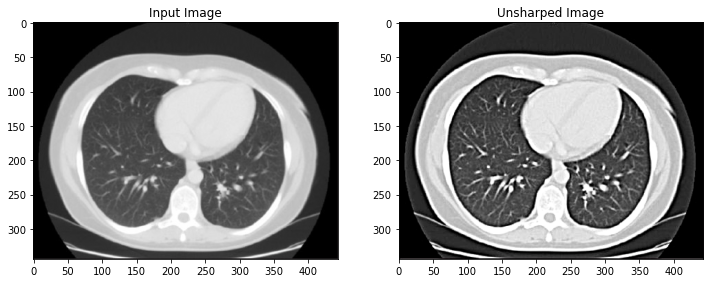

In [42]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img2)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_unsharped)
ax2.title.set_text('Unsharped Image')
plt.show()

In [43]:
# Gaussian filtering for denoising

from skimage.filters import gaussian

img_gaussian_noise = filters.gaussian(img2, sigma = 25)

<ipython-input-43-055d1b4611c5>:5: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img_gaussian_noise = filters.gaussian(img2, sigma = 25)


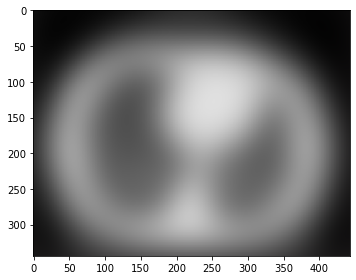

In [44]:
io.imshow(img_gaussian_noise)

In [45]:
gaussian_using_skimage = gaussian(img_gaussian_noise, sigma = 1, mode = 'constant', cval = 0.0)

<ipython-input-45-8d1cd4b16ee9>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  gaussian_using_skimage = gaussian(img_gaussian_noise, sigma = 1, mode = 'constant', cval = 0.0)


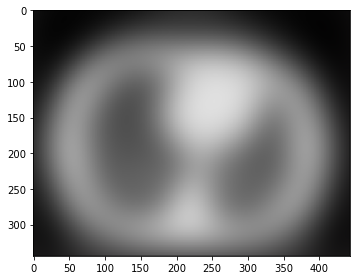

In [46]:
io.imshow(gaussian_using_skimage)

In [47]:
from skimage.color import rgb2gray
img_gaussian_noise = rgb2gray(img_gaussian_noise)

In [48]:
img_gaussian_noise.shape

(344, 443)

In [49]:
# Median filtering

from skimage.filters import median
from skimage.morphology import disk

median_usage_skimage = median(img_gaussian_noise, disk(3), mode = 'constant', cval = 0.0)

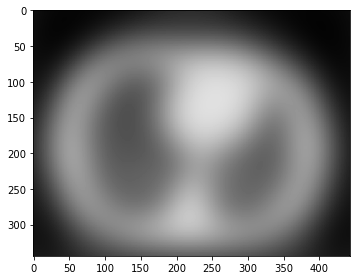

In [50]:
io.imshow(median_usage_skimage)

# OpenCV is much faster than Scikit-Image
################

In [51]:
# Gaussian filter using cv2

gaussian_using_cv2 = cv2.GaussianBlur(img_gaussian_noise, (3,3), 0, borderType = cv2.BORDER_CONSTANT)

# image ,
# Kernel of 3,3
# check documentation
#Bordertype

In [52]:
cv2.imshow( 'name',gaussian_using_cv2)

In [53]:
img_gaussian_noise = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 0)

In [54]:
img_gaussian_noise_cv2 = cv2.cvtColor(img_gaussian_noise, cv2.COLOR_BGR2RGB)

In [55]:
dst = cv2.GaussianBlur(img_gaussian_noise_cv2, (3,3), cv2.BORDER_DEFAULT)

In [56]:
import numpy as np

cv2.imshow('Check', np.hstack(dst))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#median blur

median_using_cv2 = cv2.medianBlur(img_gaussian_noise, 3)
cv2.imshow('Check', median_using_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [263]:

# colored (BGR)
img_gaussian_noise = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 1)

# gray scale
img_gaussian_noise_gray = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 1)

#resized = cv2.resize(img_gaussian_noise_gray, fx = 2, fy =2, interpolation = cv2.INTER_CUBIC)

# Edge detection using Canny

edges = cv2.Canny(img_gaussian_noise_gray, 100, 200)
cv2.imshow('resized', edges)
cv2.imshow('gray', img_gaussian_noise_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


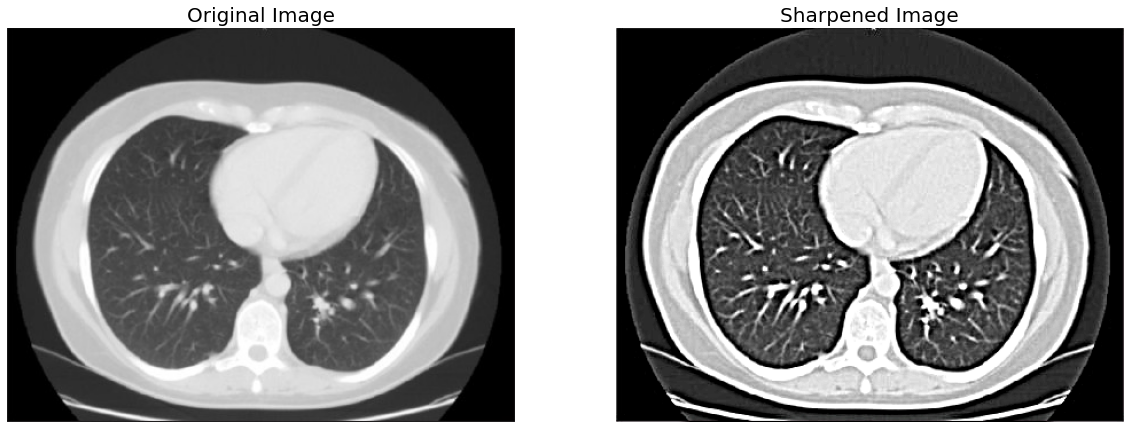

In [64]:
# Sharpening the image in cv2 using addWeighted

im = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 1)
im_blurred = cv2.GaussianBlur(im, (11,11), 10)
im1 = cv2.addWeighted(im, 1.0 + 3.0, im_blurred, -3.0, 0) # im1 = im + 3.0*(im - im_blurred)
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original Image', size=20)
plt.subplot(122),plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Sharpened Image', size=20)
plt.show()

In [65]:
# Applying Bilateral filter

bilateral_using_cv2 = cv2.bilateralFilter(im_blurred, 5, 20, 100, borderType = cv2.BORDER_CONSTANT)

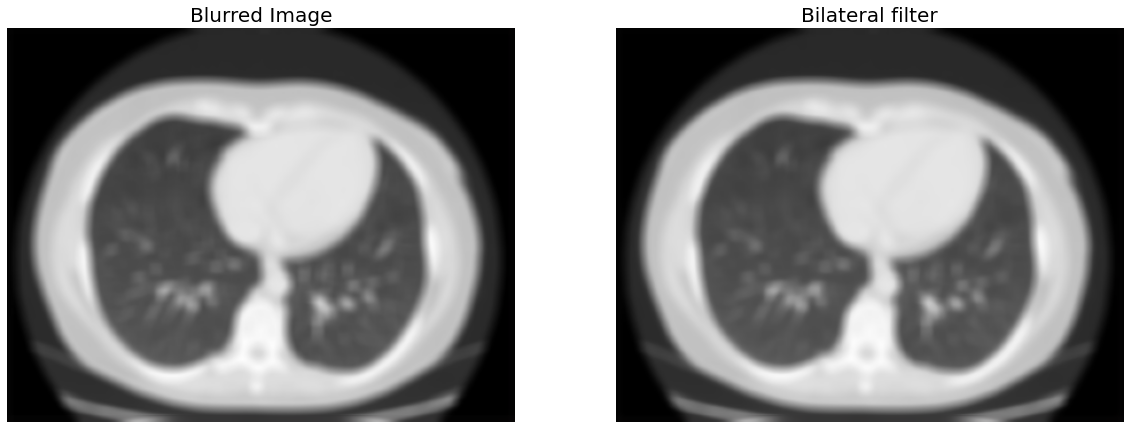

In [70]:
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(cv2.cvtColor(im_blurred, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Blurred Image', size=20)
plt.subplot(122),plt.imshow(cv2.cvtColor(bilateral_using_cv2, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Bilateral filter', size=20)
plt.show()

In [73]:
# Non Local Means Filter (NLM) - applied to CT Scan

from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

img = img_as_float(io.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', as_gray = False))

sigma_est = np.mean(estimate_sigma(img, multichannel = True))

In [74]:
sigma_est

0.0018870277992007135

In [76]:
denoise_img = denoise_nl_means(img, 
                               h = 1.15 * sigma_est,
                              fast_mode = True,
                              patch_size = 5,
                              patch_distance = 3,
                              multichannel = True)

In [78]:
# converting back the image to 8 bit for viz

from skimage import img_as_ubyte

img_as_8byte = img_as_ubyte(img)
denoise_img_as_8byte = img_as_ubyte(denoise_img)

original_img = cv2.cvtColor(img_as_8byte, cv2.COLOR_BGR2RGB)
final_denoised_img = cv2.cvtColor(denoise_img_as_8byte, cv2.COLOR_BGR2RGB)

In [80]:
cv2.imshow('Original',original_img)
cv2.imshow('NLM Filtered',final_denoised_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [82]:
!pip install bm3d

In [ ]:
# Block matching and 3D filtering (BM3D) for image denoising

# https://www.youtube.com/watch?v=HAOeYCGFGaE&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=38

In [85]:
import bm3d

img = img_as_float(io.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', as_gray = False))

BM3D_denoised_image = bm3d.bm3d(img, sigma_psd = 0.05, 
                                stage_arg = bm3d.BM3DStages.HARD_THRESHOLDING)
cv2.imshow('Original', img)
cv2.imshow('Denoised', BM3D_denoised_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [86]:
#  Edge detection - Sobel
# filters work on gray scale image
# https://www.youtube.com/watch?v=7xeMdyb3GXc&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=39

img = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 0)

from skimage.filters import roberts, sobel, scharr

roberts_img = roberts(img)
sobel_img = sobel(img)
scharr_img = scharr(img)

cv2.imshow('Roberts', roberts_img)
cv2.imshow('Sobel', sobel_img)
cv2.imshow('Scharr', scharr_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Canny Edge Detection filter
# https://www.youtube.com/watch?v=6xUBcvi-UHI&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=40

In [89]:
img = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 0)

sigma = 0.3
median = np.median(img)

# apply automatic Canny edge detection using the computed median

lower = int(max(0, (1.0 - sigma) * median))
# lower threshold is sigma % lower then median
# if the value is below 0 then take 0 as the value

upper = int(min(255, (1.0 + sigma) * median))
# Upper threshold is sigma higher than median
# if the value is larger than 255 then take 255 as the value

canny = cv2.Canny(img, lower, upper)

cv2.imshow('Original', img)
cv2.imshow('Canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Multiclass Image segmentation 

(array([26501.,   338.,   135.,   440.,    84.,   126.,   431.,    96.,
           52.,   450.,    95.,   164.,   469.,    86.,   365.,  2459.,
        13372.,  2160.,  2785.,  1453.,  1408.,  1361.,   850.,  1078.,
         1071.,  2149.,  1851.,  3658.,  2779.,  4732.,  4843.,  2764.,
         3248.,  1624.,  2075.,  1020.,  1261.,   643.,   860.,   451.,
          571.,   507.,   296.,   409.,   261.,   360.,   213.,   324.,
          205.,   271.,   246.,   172.,   238.,   177.,   250.,   146.,
          227.,   154.,   209.,   147.,   224.,   209.,   146.,   234.,
          138.,   222.,   133.,   233.,   149.,   203.,   232.,   169.,
          280.,   260.,  2083.,  4976.,  5791.,  1978.,  2015.,  1079.,
         1489.,  1571.,  1144.,  2154.,  1744.,  3712.,  3135.,  3344.,
         2138.,  6546.,  2085.,   284.,   312.,   243.,   492.,   393.,
          537.,   353.,   699.,  2093.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

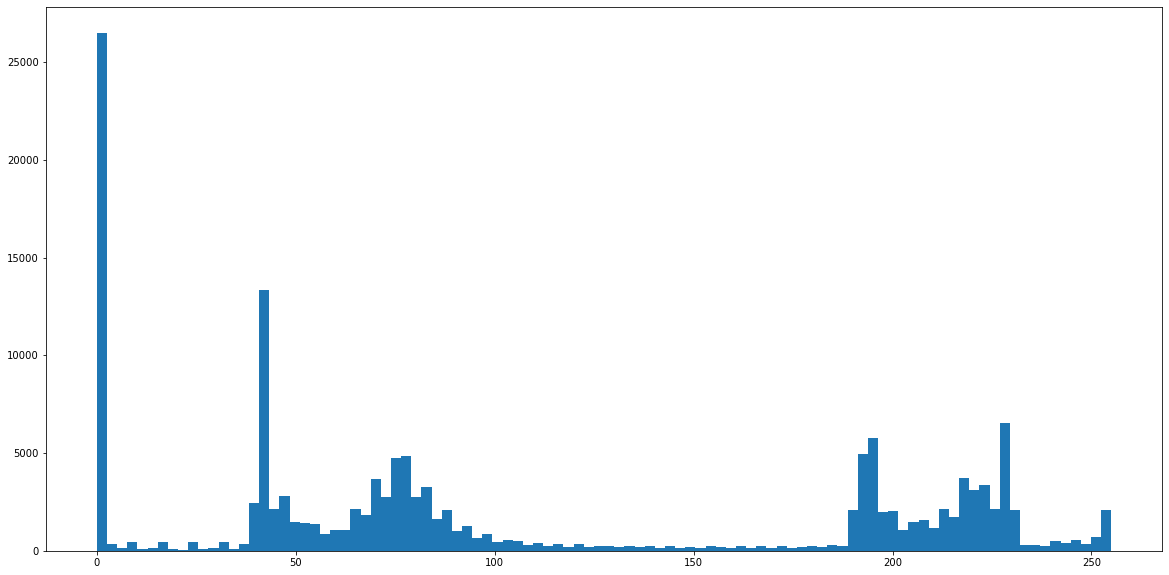

In [104]:

# https://www.youtube.com/watch?v=3fMgy7VTYH0&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=53
plt.figure(figsize=(20,10))    
#plt.imshow(img, cmap = 'gray')
plt.hist(img.flat, bins = 100, range=(0,255))

In [141]:
from skimage.filters import threshold_multiotsu

In [114]:
thresholds = threshold_multiotsu(img, classes = 4)

In [115]:
thresholds

array([ 23,  65, 148])

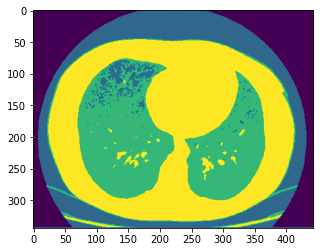

In [116]:
# Segment original image into multiple class

regions = np.digitize(img, bins = thresholds)
plt.imshow(regions)

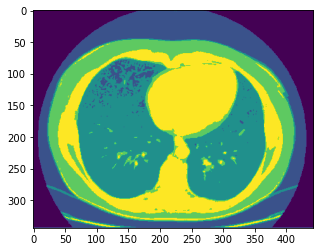

In [113]:
#thresholds = 5
regions2 = np.digitize(img, bins = thresholds)
plt.imshow(regions2)

In [117]:
segm1 = (regions == 0)
segm2 = (regions == 1)
segm3 = (regions == 2)
segm4 = (regions == 3)

In [118]:
# Use binary opening and closing operations to clean-up

from scipy import ndimage as nd

segm1_opened = nd.binary_opening(segm1, np.ones((3, 3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3, 3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3, 3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3, 3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((img.shape[0], img.shape[1], 3))

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

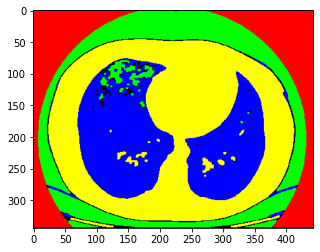

In [119]:
plt.imshow(all_segments_cleaned)

# Texture based segmentation 

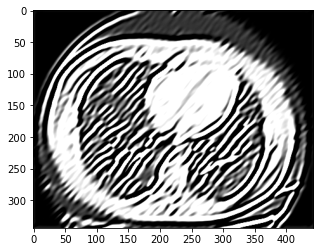

In [124]:
# Texture is characterized by spatial distribution of intensity levels in a neighborhood
# Quantify texture - Variance/Entropy/Gabor-filter

# Entropy is a better texture filter than Gabor

# Applying Gabor - if we know exact parameters, it is a good choice

ksize = 45
theta = np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype = cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap = 'gray')

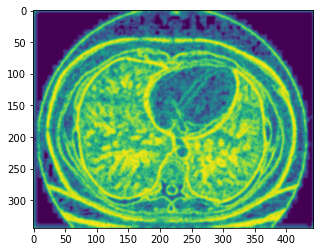

In [136]:
# Applying Entropy + multiotsu

from skimage.filters.rank import entropy
from skimage.morphology import disk

entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

In [137]:
entropy_img

array([[2.73215889, 2.75343439, 2.91099225, ..., 2.53414684, 2.55665671,
        2.73215889],
       [2.41379956, 2.64160417, 2.86763389, ..., 2.42267547, 2.47385139,
        2.55665671],
       [2.53660825, 2.35649241, 2.79955463, ..., 2.16229491, 2.18189906,
        2.17397313],
       ...,
       [3.00719649, 3.00488616, 2.86527454, ..., 2.26013763, 2.42267547,
        2.77777681],
       [3.09306921, 2.81401545, 2.63880672, ..., 2.45698854, 2.61436945,
        2.75343439],
       [3.27761344, 3.09306921, 2.81384611, ..., 2.53414684, 2.80735492,
        3.09579526]])

(array([16710.,     0.,     0.,     0.,  1833.,     0.,     0.,   422.,
          274.,   322.,     0.,   622.,    31.,  1347.,   455.,   810.,
          337.,   710.,   627.,  1478.,   530.,   399.,   972.,   704.,
          789.,  1110.,   851.,  1064.,   870.,  1475.,  1509.,  1761.,
          898.,  1329.,  1463.,  1112.,  1725.,  1332.,  1355.,  1589.,
         1217.,  1592.,  1536.,  1473.,  1544.,  1472.,  1523.,  1410.,
         1493.,  1536.,  1451.,  1472.,  1461.,  1429.,  1394.,  1430.,
         1672.,  1501.,  1616.,  1769.,  1733.,  1948.,  1899.,  1983.,
         2188.,  2116.,  2484.,  2044.,  2467.,  2338.,  2305.,  2434.,
         2567.,  2482.,  2757.,  2384.,  2329.,  2323.,  2483.,  2273.,
         2839.,  1889.,  1892.,  1851.,  1630.,  1976.,  2289.,  1138.,
         1932.,  1343.,  1230.,  2433.,   599.,  1862.,  1627.,  1170.,
            0.,   349.,     0.,     0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 

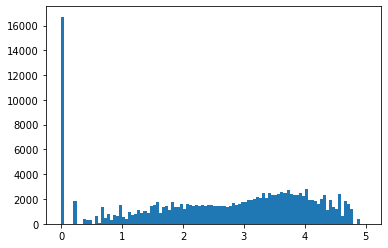

In [139]:
# Applying Otsu to segment high vs low entropy regions 

plt.hist(entropy_img.flat, bins = 100, range = (0, 5))

# value of range can be till the max value of image in previous box + 1

In [145]:
#from skimage.filters import threshold_otsu

thresh = threshold_multiotsu(entropy_img, classes = 4)
print(thresh)

[1.03421861 2.47643172 3.6339975 ]


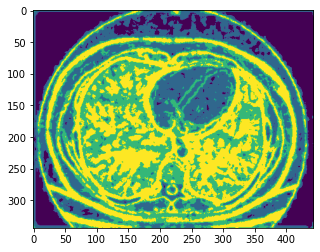

In [149]:
regions_new = np.digitize(entropy_img, bins = thresh)
plt.imshow(regions_new)

# Image segmentation followed by measurements
# https://www.youtube.com/watch?v=qfUJHY3ku9k&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=56

In [159]:
img = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', 0)

In [162]:
# binary threshold

from skimage.filters import threshold_otsu
threshold = threshold_otsu(img)

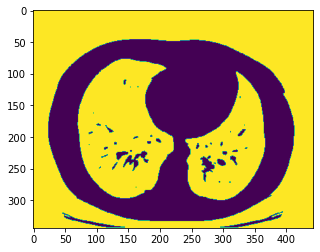

In [164]:
thresholded_img = img < threshold
plt.imshow(thresholded_img)

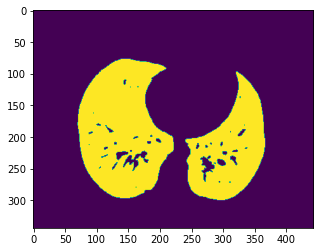

In [165]:
# remove edge touching regions

from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresholded_img)
plt.imshow(edge_touching_removed)

# any of the continuous pixels are not touching the edge

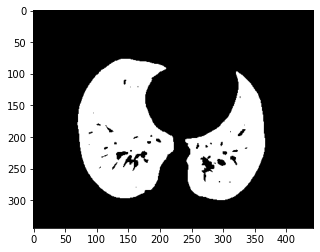

In [166]:
plt.imshow(edge_touching_removed, cmap = 'gray') # gray image

In [167]:
# label connected regions of an integer array using measure.label
# labels each connected entity as one object
# Connectivity = Max number of orthogonal hops to consider a pixel/voxel as a neighbor
# If none, a full connectivity of input.ndim is used
# Number of dimensions of the image for 2D image would be 2

from skimage import measure

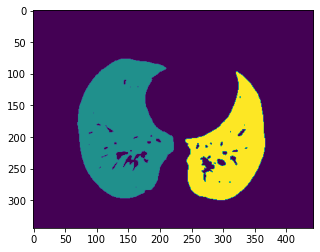

In [168]:
label_image = measure.label(edge_touching_removed, connectivity = img.ndim)

plt.imshow(label_image)

In [216]:
# Once image is labelled - let's color each label in a random color
from skimage.color import label2rgb, rgb2gray

<ipython-input-171-736f2224ad48>:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(label_image, image = img)


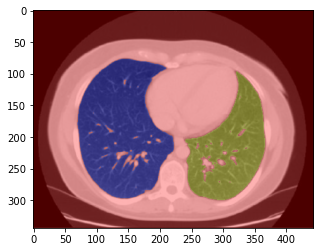

In [171]:
# Return  an RGB image where color-coded labels are pointed over the image
# Use label2rgb

image_label_overlay = label2rgb(label_image, image = img)
plt.imshow(image_label_overlay)

In [173]:
# Computing the properties of image and return them as pandas table
# Use regionprops_table
#Available parameters regionprops: area, bbox, centroid, covex_area, coords, eccentricity,
# equivalent diameter, euler number, label, intensity image, major axis length,
# max intensity, mean intensity, moments, orientation, perimeter, solidity.....

props = measure.regionprops_table(label_image, img,
                                 properties =['label', 
                                             'area',
                                             'equivalent_diameter',
                                             'mean_intensity', 'solidity'])

In [175]:
props

{'label': array([1, 2]),
 'area': array([22688, 13915]),
 'equivalent_diameter': array([169.96252172, 133.10570335]),
 'mean_intensity': array([78.42678949, 82.53093784]),
 'solidity': array([0.84505364, 0.77542491])}

In [177]:
import pandas as pd
df = pd.DataFrame(props)
df.head(10)

,label,area,equivalent_diameter,mean_intensity,solidity
0,1,22688,169.962522,78.426789,0.845054
1,2,13915,133.105703,82.530938,0.775425


In [178]:
# Convert to micron scale
# Current scale is in sq microns

scale = 0.6 #microns/pixel

df['area_sq_microns'] = df['area'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)
df.head()

,label,area,equivalent_diameter,mean_intensity,solidity,area_sq_microns,equivalent_diameter_microns
0,1,22688,169.962522,78.426789,0.845054,8167.68,101.977513
1,2,13915,133.105703,82.530938,0.775425,5009.40,79.863422


# Blob detections

In [ ]:
# BLOB - Binary Large Object refers to group of connected pixels in a binary image
# https://www.youtube.com/watch?v=2puHfSKnG7c&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=57

# Segmentation in python using watershed

In [179]:
img = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png')

In [181]:
img.shape

(344, 443, 3)

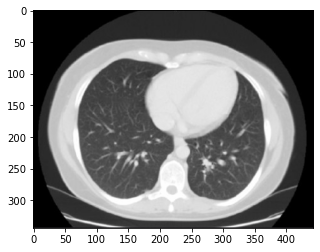

In [182]:
plt.imshow(img)

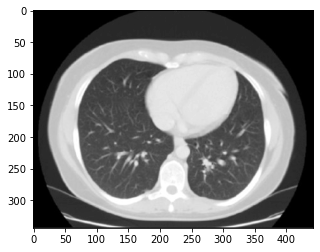

In [184]:
# Extract only blue channel

cells = img[:,:,0] # Blue channel. Image equivalent to grey image
plt.imshow(cells, cmap = 'gray')

In [185]:
pixels_to_um = 0.454 # 1 pixel = 454 nm ( got this from metadata of original image)

# Threshold image to binary using OTSU. All thresholds pixels will be set to 255

ret1, thresh = cv2.threshold(cells, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [186]:
print(ret1)

128.0


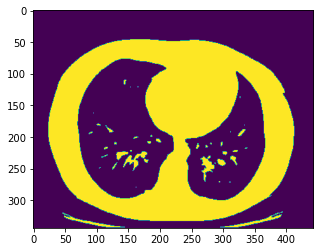

In [188]:
plt.imshow(thresh)

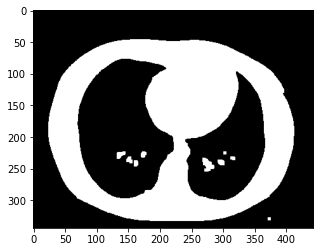

In [189]:
# Morphological operations to remove small noise - opening
# To remove holes we can use closing

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

from skimage.segmentation import clear_border
opening = clear_border(opening) # Remove edge touching grains
plt.imshow(opening, cmap = 'gray')

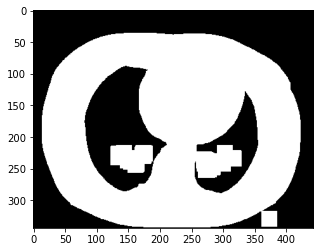

In [190]:
# Sure backround - watch the tutorial for revision

sure_bg = cv2.dilate(opening, kernel, iterations = 10)
plt.imshow(sure_bg, cmap = 'gray')

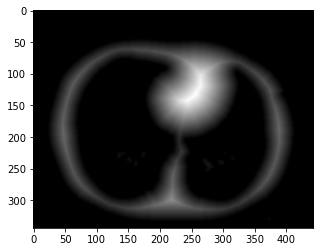

In [191]:
# Sure foreground

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap = 'gray') # distance transformed image

In [192]:
# Let us threshold the dist transform by starting at 1/2 its max value

print(dist_transform.max())

61.513187


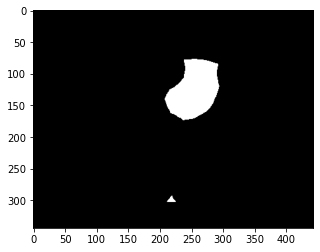

In [193]:
ret2, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
plt.imshow(sure_fg, cmap = 'gray')

In [195]:
# Convert to uint8 from float

sure_fg = np.uint8(sure_fg)

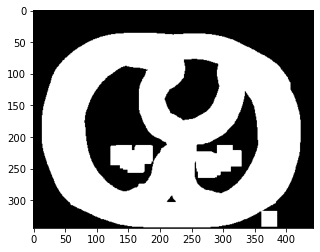

In [196]:
# Unknown ambiguous region is nothing but background - foreground
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap = 'gray')

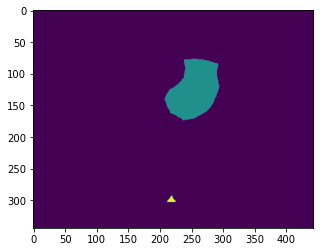

In [197]:
# Use connectedComponents to group and lable the pixels in image

ret3, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers)

In [206]:
# Entire background pixels have been given a value 0 above
# This means watershed considers this regions as unknown
# Let us add 10 to all labels so that sure background is not 0 but 10

markers = markers + 10

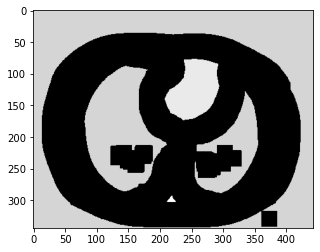

In [210]:
# Now mark the region of unknown with zero

markers[unknown == 255] = 0
plt.imshow(markers, cmap = 'gray')

In [211]:
# Now we are ready for watershed filling

markers = cv2.watershed(img, markers)

In [212]:
# Let us consider boundaries in yellow
# Remember that watershed assigns boundaries a value of -1

img[markers == -1] = [0, 255, 255]

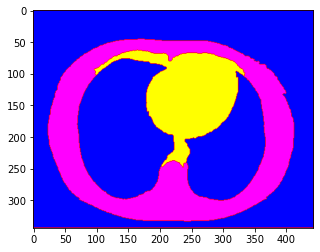

In [220]:
#Label2rgb - Return an RGB image where color-coded labels are painted over the image

img2 = label2rgb(markers, bg_label = 0)
plt.imshow(img2)

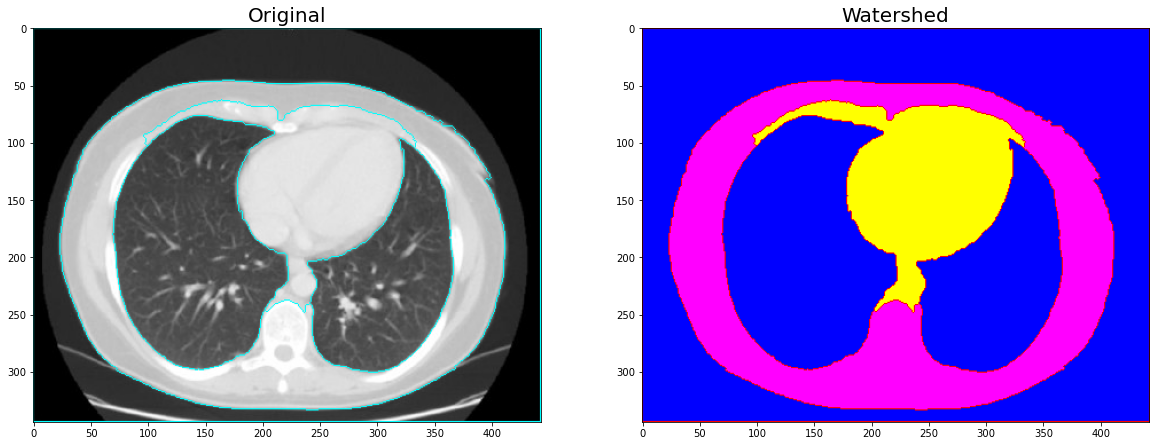

In [221]:
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img), plt.title('Original', size=20)
plt.subplot(122),plt.imshow(img2), plt.title('Watershed', size=20)
plt.show()

In [222]:
# Extract the properties of detected 
# Directly capturing props to pandas df

props = measure.regionprops_table(markers, cells, 
                                 properties = ['label',
                                              'area',
                                              'equivalent_diameter',
                                              'mean_intensity',
                                              'solidity',
                                              'orientation',
                                              'perimeter'])

In [223]:
df= pd.DataFrame(props)
df.head()

,label,area,equivalent_diameter,mean_intensity,solidity,orientation,perimeter
0,10,95433,348.581511,49.518605,0.632753,1.567709,4006.346463
1,11,17699,150.116843,221.457144,0.628583,1.017458,920.128030
2,12,35237,211.813932,209.056475,0.378274,1.501716,2245.937300


In [ ]:
# If required we can filter out any lable with area less than a threshold

In [224]:
# convert to micron scale

df['area_sq_microns'] = df['area'] * (pixels_to_um**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (pixels_to_um)
df.head()

,label,area,equivalent_diameter,mean_intensity,solidity,orientation,perimeter,area_sq_microns,equivalent_diameter_microns
0,10,95433,348.581511,49.518605,0.632753,1.567709,4006.346463,19670.268228,158.256006
1,11,17699,150.116843,221.457144,0.628583,1.017458,920.128030,3648.047084,68.153047
2,12,35237,211.813932,209.056475,0.378274,1.501716,2245.937300,7262.909492,96.163525


In [ ]:
# above topics were pixel level segmentation

# Object detection using template matching

https://www.youtube.com/watch?v=PqVH9IHMLss&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=59

In [225]:
# K-means for image segmentation

from sklearn.cluster import KMeans
from skimage import io

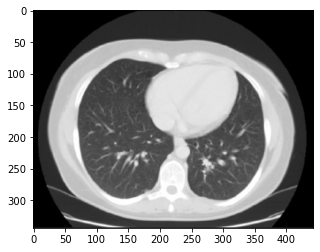

In [227]:
img = io.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png', as_gray = False)
plt.imshow(img)

In [228]:
img.shape

(344, 443, 3)

In [229]:
# Convert MxNx3 image into Kx3 where KxMxN
img2 = img.reshape((-1, 3)) # -1 means MxN
img2.shape

(152392, 3)

In [236]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
model = kmeans.fit(img2)
predicted_values = kmeans.predict(img2)

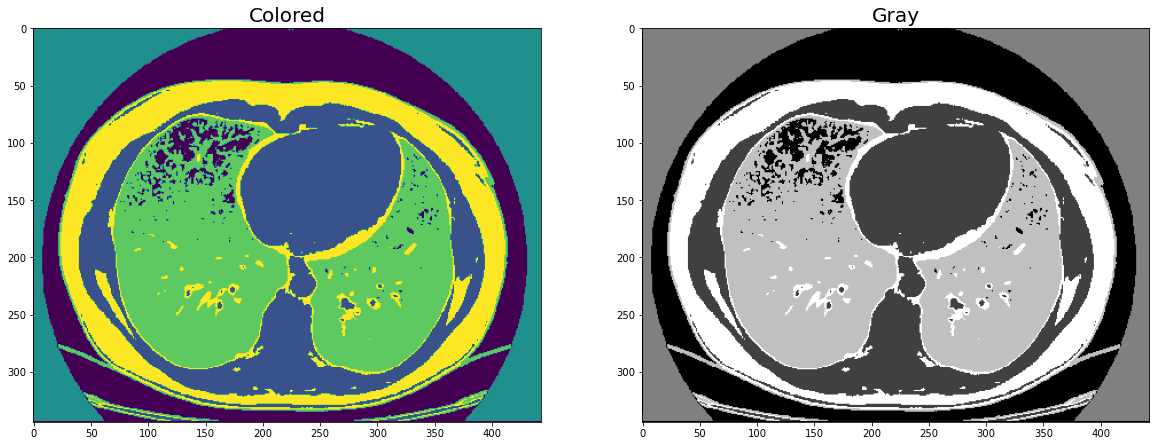

In [237]:
# reshaping it back to original shape

segm_image = predicted_values.reshape((img.shape[0], img.shape[1]))

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(segm_image), plt.title('Colored', size=20)
plt.subplot(122),plt.imshow(segm_image , cmap = 'gray'), plt.title('Gray', size=20)
plt.show()

# Gaussian Mixture Model (GMM) for image segmentation

https://www.youtube.com/watch?v=__UcukytHuc&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=74

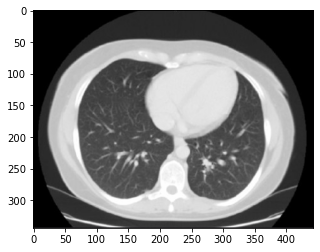

In [241]:
# addresses the shortcomings of KMeans
# Elbow method to find the perfect #clusters

img = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\train\normal\3 - Copy (3).png')
plt.imshow(img)

In [243]:
# Convert MxNx3 image into Kx3 where K = MxN

img2 = img.reshape((-1, 3))
img2.shape

(152392, 3)

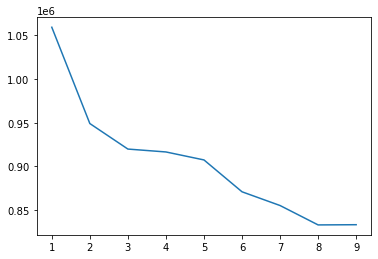

In [251]:
from sklearn.mixture import GaussianMixture as GMM

# Call the BIC method for n = 1 to 10 and plot it to find the elbow
# covariance_type - full, tied, diag, spherical

n_components = np.arange(1, 10)
gmm_models = [GMM(n, covariance_type = 'tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label = 'BIC')
#bic_value = gmm_model.bic(img2)


In [261]:
# Taking n = 3
# Image seems to be having noise therefore we see multiple elbows
# Took n = 4 because 3 was putting external parts of scan together with internal

gmm_model = GMM(n_components =4, covariance_type = 'tied').fit(img2)
gmm_labels = gmm_model.predict(img2)
np.unique(gmm_labels)

array([0, 1, 2, 3], dtype=int64)

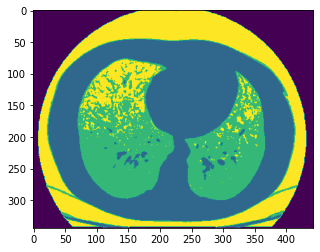

In [262]:
# Put numbers back to oiginal shape so we can recontruct segmented image

original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
plt.imshow(segmented)

In [314]:
####################################################################
## STEP 1:   READ TRAINING IMAGES AND EXTRACT FEATURES 
################################################################
import os 
import matplotlib.pyplot as plt

image_dataset = pd.DataFrame()  #Dataframe to capture image features

img_path = r"C:\Users\nishantjairath\Downloads\archive\Data\Check"

for image in os.listdir(img_path):  #iterate through each file 
    #print(image)
    
    df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
    #Reset dataframe to blank after each loop.
    
    input_img = cv2.imread(img_path + image)  #Read images
    #plt.imshow(input_img)
    #img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    #Check if the input image is RGB or grey and convert to grey if RGB
    '''
    if input_img.ndim == 3 and input_img.shape[-1] == 3:
        img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    elif input_img.ndim == 2:
        img = input_img
    else:
        raise Exception("The module works only with grayscale and RGB images!")
    '''
################################################################
#START ADDING DATA TO THE DATAFRAME
        
        
    #Add pixel values to the data frame
    pixel_values = img.reshape(-1)
    df['Pixel_Value'] = pixel_values   #Pixel value itself as a feature
    df['Image_Name'] = image   #Capture image name as we read multiple images
    
    
############################################################################    
        #Generate Gabor features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []
    for theta in range(2):   #Define number of thetas
        theta = theta / 4. * np.pi
        for sigma in (1, 3):  #Sigma with 1 and 3
            for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
                for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                
                    
                    gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                    num += 1  #Increment for gabor column label
                    
        
########################################
#Gerate OTHER FEATURES and add them to the data frame
'''                
    #CANNY EDGE
    #img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
    b,g,r = cv2.split(img)
    #edges = cv2.Canny(img, 100,200)   #Image, min and max values
    b = cv2.Canny(b, 100,200)
    g = cv2.Canny(g, 100,200)
    r = cv2.Canny(r, 100,200)
    edges = cv2.merge((b,g,r))
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe'''
#################################################################
    thresh_sigma = 0.33
    #splitting image into respective 3 channels
    b,g,r = cv2.split(img)
    for i in (b,g,r):

        median = np.median(i)
        #print(median)
        lower = int(max(0, (1.0 - thresh_sigma) * median))
        upper = int(min(255, (1.0 + thresh_sigma) * median))
        i = cv2.Canny(i, lower, upper)
        #print(edges.shape)
    edges = cv2.merge((b,g,r))
    edges1 = edges.reshape(-1)
    #print(edges1.shape)
    df['Canny Edge'] = edges1

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [298]:
thresh_sigma = 0.33
#splitting image into respective 3 channels
b,g,r = cv2.split(img)
for i in (b,g,r):

    median = np.median(i)
    #print(median)
    lower = int(max(0, (1.0 - thresh_sigma) * median))
    upper = int(min(255, (1.0 + thresh_sigma) * median))
    i = cv2.Canny(i, lower, upper)
    #print(edges.shape)
edges = cv2.merge((b,g,r))
edges1 = edges.reshape(-1)
#print(edges1.shape)
df['Canny Edge'] = edges1

In [315]:
df['Canny Edge'].value_counts()

0      70678
41     18940
42     12828
193     8606
43      8349
       ...  
14       102
20        92
21        83
22        73
27        73
Name: Canny Edge, Length: 256, dtype: int64

In [316]:
df.tail(20)

,Pixel_Value,Image_Name,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,...,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny Edge
457156,31,3 - Copy.png,0,0,18,18,6,6,2,2,...,6,0,0,49,52,2,2,19,17,31
457157,33,3 - Copy.png,0,0,26,22,8,7,3,3,...,6,0,0,65,64,1,1,20,17,33
457158,32,3 - Copy.png,0,0,21,19,7,6,3,3,...,6,0,0,57,58,3,3,19,17,32
457159,31,3 - Copy.png,0,0,18,18,6,6,2,2,...,6,0,0,53,55,1,1,18,16,31
457160,33,3 - Copy.png,0,0,26,22,8,7,3,3,...,6,0,0,68,67,4,3,20,17,33
457161,32,3 - Copy.png,0,0,20,19,7,6,3,3,...,5,0,0,76,67,7,3,24,18,32
457162,31,3 - Copy.png,0,0,17,17,6,6,3,3,...,5,0,0,70,63,7,4,23,18,31
457163,33,3 - Copy.png,0,0,25,21,8,7,4,3,...,5,0,0,87,76,7,4,25,19,33
457164,32,3 - Copy.png,0,0,21,19,6,5,0,0,...,7,0,0,88,79,0,2,20,17,32
457165,31,3 - Copy.png,0,0,18,18,5,5,0,0,...,7,0,0,81,74,0,1,21,18,31


In [296]:
for i in (b,g,r):
    print(i)
    print("Hello")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Hello
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255   0   0 ...   0   0   0]
 [255 255   0 ...   0 255 255]
 [  0   0 255 ... 255   0   0]]
Hello
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Hello


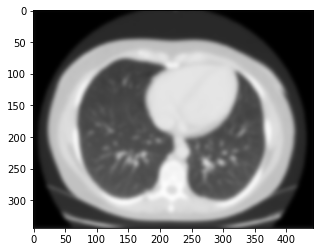

In [317]:
img = cv2.imread(r'C:\Users\nishantjairath\Downloads\archive\Data\Check\3 - Copy.png')

plt.imshow(img)

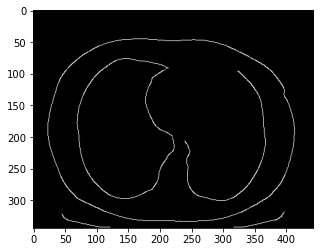

In [318]:
#CANNY EDGE
#img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
b,g,r = cv2.split(img)
#edges = cv2.Canny(img, 100,200)   #Image, min and max values
b = cv2.Canny(b, 100,200)
g = cv2.Canny(g, 100,200)
r = cv2.Canny(r, 100,200)
edges = cv2.merge((b,g,r))
edges1 = edges.reshape(-1)
#df['Canny Edge'] = edges1

plt.imshow(edges)

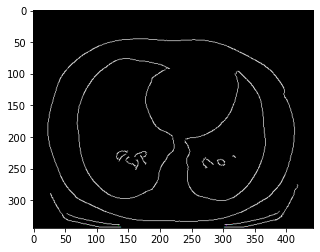

In [320]:
thresh_sigma = 0.33
#splitting image into respective 3 channels
b,g,r = cv2.split(img)

median_b = np.median(b)
lower_b = int(max(0, (1.0 - thresh_sigma) * median_b))
upper_b = int(min(255, (1.0 + thresh_sigma) * median_b))

median_g = np.median(g)
lower_g = int(max(0, (1.0 - thresh_sigma) * median_g))
upper_g = int(min(255, (1.0 + thresh_sigma) * median_g))

median_r = np.median(r)
lower_r = int(max(0, (1.0 - thresh_sigma) * median_r))
upper_r = int(min(255, (1.0 + thresh_sigma) * median_r))

b = cv2.Canny(b, lower_b, upper_b)
g = cv2.Canny(g, lower_g, upper_g)
r = cv2.Canny(r, lower_r, upper_r)

edges = cv2.merge((b,g,r))
edges1 = edges.reshape(-1)

plt.imshow(edges)

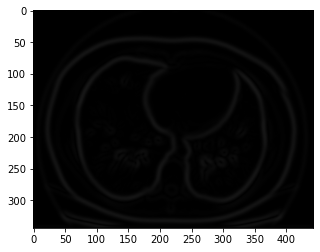

In [322]:
#edge_roberts = roberts(img)

b,g,r = cv2.split(img)

b = roberts(b)
g = roberts(g)
r = roberts(r)
edge_roberts = cv2.merge((b,g,r))
edge_roberts1 = edge_roberts.reshape(-1)
#df['Roberts'] = edge_roberts1

#plt.imshow(edge_roberts)